In [1]:
!pip install roboflow ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 536.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 27.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
    

In [1]:
from roboflow import Roboflow
import  os
import cv2 as cv
import matplotlib.pyplot as plt
from ultralytics import YOLO
import  numpy as np

In [2]:
HOME = os.getcwd()
HOME

'D:\\workspace\\Python\\Deep_learning\\Projects\\Read_student_card\\Text_Detection'

In [3]:
model_path = f'{HOME}/best.pt'

In [6]:
rf = Roboflow(api_key="rvoivVux1KVPqjOIUb7R")
project = rf.workspace("deeplearning-tpicp").project("student-card-text-detection")
version = project.version(11)

loading Roboflow workspace...
loading Roboflow project...


In [7]:
version.deploy('yolov8', f'{HOME}/runs/detect/train3')

Dependency ultralytics==8.0.196 is required but found version=8.1.18, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/deeplearning-tpicp/student-card-text-detection/11
Share your model with the world at: https://universe.roboflow.com/deeplearning-tpicp/student-card-text-detection/model/11


In [8]:
dataset = version.download("yolov8", './data')

Dependency ultralytics==8.0.196 is required but found version=8.1.18, to fix: `pip install ultralytics==8.0.196`


In [4]:
data_dir = f'{HOME}/data'

In [11]:
names = []

In [12]:
import yaml

In [13]:
with open(f'{data_dir}/data.yaml', "r") as file:
    yaml_content = yaml.load(file, Loader=yaml.SafeLoader)
    names.extend(yaml_content['names'])
print(names)

['ID', 'birth', 'class', 'gender', 'name', 'subject']


In [9]:
with open(f'{data_dir}/data.yaml', "w") as file:
    yaml.dump({
        "train": f"{data_dir}/train/images",
        "test": f"{data_dir}/test/images",
        "val": f"{data_dir}/valid/images",
        "nc": len(names),
        "names": [f'{name}' for name in names]
    }, stream=file, default_flow_style=None)

In [11]:
model = YOLO("./yolov8m.pt")
model.train(data=f'{dataset.location}/data.yaml', epochs=100, imgsz=640)

100%|██████████| 49.7M/49.7M [00:00<00:00, 210MB/s] 


Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=./yolov8m.pt, data=/kaggle/working/Student-Card-(Image-detection)-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 13.5MB/s]
2024-03-02 06:28:15,509	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-02 06:28:16,600	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-02 06:28:21.391457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 06:28:21.391595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 06:28:21.732147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 68.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Student-Card-(Image-detection)-1/train/labels... 166 images, 2 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<00:00, 999.84it/s]

train: New cache created: /kaggle/working/Student-Card-(Image-detection)-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Student-Card-(Image-detection)-1/valid/labels... 14 images, 7 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 1144.38it/s]

val: New cache created: /kaggle/working/Student-Card-(Image-detection)-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.83G      1.953        3.4      1.957         32        640: 100%|██████████| 11/11 [00:09<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         14         27      0.212      0.497      0.211      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.14G      1.324      1.571      1.398         28        640: 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14         27      0.263      0.775      0.448      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       7.2G      1.275      1.237      1.316         31        640: 100%|██████████| 11/11 [00:04<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         14         27       0.34      0.729      0.426      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.14G       1.27      1.194      1.339         40        640: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         14         27      0.319      0.861      0.498       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.18G      1.315      1.206      1.347         56        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         14         27      0.319      0.748      0.418      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       7.2G      1.273       1.09      1.344         54        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         14         27      0.418      0.746       0.46      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.18G      1.263      1.041      1.317         39        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         27       0.24      0.722      0.318      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.19G      1.349      1.028      1.344         55        640: 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27       0.41      0.812      0.416      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.14G      1.313      1.015       1.35         56        640: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         14         27      0.363      0.798      0.448      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.17G       1.33       1.07      1.352         41        640: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         14         27      0.194      0.667      0.326      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.16G      1.272     0.9909      1.329         54        640: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         14         27      0.284      0.719      0.328      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.19G      1.256     0.9648      1.343         31        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27      0.361      0.697      0.486      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.17G      1.195     0.8448      1.297         41        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         14         27      0.433      0.865      0.479      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.19G      1.257     0.8912      1.316         39        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         14         27      0.442      0.699      0.543      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.21G      1.261     0.8644      1.319         43        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         14         27      0.445      0.803      0.549      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.21G      1.204     0.8408      1.287         47        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         14         27      0.457      0.896      0.721      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.15G      1.195      0.865      1.311         35        640: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27      0.533      0.844      0.666      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.18G      1.207     0.8215      1.305         30        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         14         27      0.525       0.95      0.613      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.16G      1.167     0.7941      1.279         42        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         14         27      0.484      0.847      0.545      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       7.2G      1.156     0.7714      1.254         45        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         14         27      0.554       0.75      0.551      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.14G      1.171     0.7806      1.274         29        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         14         27      0.583      0.796      0.553      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.18G      1.142     0.7829       1.28         45        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         27      0.613      0.779      0.671      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.16G      1.154     0.7742      1.285         25        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         14         27      0.484      0.844      0.652      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.17G      1.126     0.7709      1.251         35        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         14         27      0.533      0.969      0.633      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.13G      1.135     0.7775      1.277         37        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         14         27      0.559      0.969      0.657      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.18G      1.095     0.7613      1.268         28        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         14         27      0.526      0.924      0.605      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.19G      1.137     0.7536      1.302         40        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27      0.535      0.927      0.638      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.21G      1.102     0.7429      1.261         41        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         27      0.493      0.967      0.682      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.16G       1.08        0.7      1.238         46        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         14         27      0.509      0.885      0.638      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.17G      1.122     0.6991      1.257         36        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         14         27      0.561      0.969      0.682      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.15G        1.1     0.7449      1.238         35        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

                   all         14         27      0.579      0.927      0.682      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.19G      1.094     0.7351      1.263         40        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         14         27      0.579      0.927      0.673      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.15G       1.09     0.6909      1.235         44        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         14         27      0.605      0.854      0.645      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.18G      1.037      0.655      1.191         58        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         14         27      0.569      0.923       0.65       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.17G      1.092     0.6999      1.251         50        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         14         27      0.605      0.937      0.677      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.19G      1.073     0.6728      1.209         48        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         14         27      0.589      0.969      0.742      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.14G      1.043     0.6845      1.223         38        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         14         27      0.532      0.967      0.684      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.17G      1.024     0.6595      1.225         43        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         14         27      0.633      0.927      0.771      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.15G      1.085     0.7032      1.243         52        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         14         27      0.585      0.969      0.712      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.19G      1.061     0.6798      1.216         50        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         14         27      0.536      0.927      0.631      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.16G      1.035     0.6524       1.19         32        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         14         27      0.519      0.854      0.633      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.15G       1.02     0.6729      1.204         34        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         14         27      0.491      0.823       0.59      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.19G       1.06     0.6755      1.228         29        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27      0.527      0.927       0.67      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.16G      1.028     0.6529      1.197         38        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         27      0.573      0.938      0.728      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.16G      1.042     0.6492      1.218         48        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         14         27       0.59      0.948      0.726      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.17G      1.042     0.6476      1.217         37        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         14         27      0.565      0.969      0.688      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.19G      0.985     0.6389      1.196         30        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         14         27      0.597      0.965      0.685      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.2G      1.026     0.6549      1.216         38        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         14         27      0.559       0.91      0.697      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.15G     0.9711     0.5776      1.172         38        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         14         27      0.562      0.951      0.726      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.19G      1.018     0.6633      1.198         35        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         14         27      0.578      0.969      0.684      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.15G     0.9763     0.6056      1.139         40        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         14         27       0.59      0.969      0.711      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       7.2G     0.9756     0.6005      1.178         34        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         14         27      0.587      0.975      0.722      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.15G     0.9609     0.5843      1.182         37        640: 100%|██████████| 11/11 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         14         27      0.586      0.967      0.696      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.17G     0.9182     0.5775      1.146         43        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         14         27      0.608      0.969      0.762      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.18G     0.9582     0.5788      1.171         36        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         14         27      0.595      0.927      0.695      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.18G     0.9589     0.5718      1.166         38        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         14         27      0.546      0.953      0.651       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.17G     0.9459     0.5689      1.167         55        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         14         27      0.549      0.969      0.651      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.17G     0.9334     0.5525      1.134         45        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         14         27       0.57      0.941      0.682      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.18G     0.9442     0.5981      1.174         35        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         14         27      0.557      0.969      0.655      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.17G     0.9373     0.5584      1.166         47        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         14         27      0.575      0.969      0.681      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.17G     0.9453      0.594      1.151         57        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         14         27      0.578      0.969      0.677      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.17G     0.9082     0.5352      1.108         35        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27      0.574      0.969      0.708      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.18G     0.8937     0.5582      1.129         45        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         14         27      0.564      0.969       0.69      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.16G     0.8746     0.5385       1.12         40        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         14         27      0.529      0.968      0.753      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.13G     0.8549     0.5533       1.13         39        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         14         27      0.527      0.961      0.761      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.18G     0.8655     0.5347      1.105         43        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         14         27      0.581      0.916       0.77      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.17G     0.8949     0.5374      1.121         44        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         14         27      0.536      0.989      0.717      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.15G     0.8646     0.5363      1.129         47        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         14         27      0.537      0.957      0.654      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.16G     0.8541     0.5511      1.145         27        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         14         27       0.54      0.943      0.627      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.18G     0.8565     0.5064      1.124         40        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         14         27      0.561      0.949      0.643      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.14G     0.8248     0.5103      1.095         31        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         14         27      0.569      0.938      0.645      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.19G     0.8407     0.5048      1.107         43        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         14         27      0.554      0.968      0.689      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.15G     0.8261     0.4878      1.099         42        640: 100%|██████████| 11/11 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         27      0.567      0.969      0.686      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.18G     0.8149     0.5066      1.107         44        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         14         27      0.566      0.971      0.685      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.17G     0.8101     0.4981      1.087         49        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         14         27      0.576       0.98      0.685      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.18G     0.8316     0.4942      1.099         39        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         14         27      0.563      0.969      0.691      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.17G     0.7968     0.4906      1.087         58        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         27      0.569      0.969      0.728      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.18G     0.7561     0.4563      1.075         39        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         14         27      0.546      0.969      0.698      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.18G     0.7923     0.4604      1.074         46        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         14         27      0.565      0.965      0.663      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.17G     0.7866     0.4593      1.083         36        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         14         27      0.575      0.938      0.628      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.14G     0.7932      0.479      1.084         48        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         14         27      0.559      0.969      0.649      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.18G     0.7865     0.4936      1.099         38        640: 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         14         27      0.556      0.968      0.642      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.17G     0.7617     0.4723      1.072         28        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         14         27      0.565      0.927       0.67      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       7.2G     0.7346     0.4627      1.076         42        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         14         27      0.536      0.899      0.685      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.15G     0.7479     0.4524      1.057         48        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         14         27      0.535      0.899      0.688      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.17G      0.762     0.4571      1.078         47        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         14         27       0.53      0.931      0.686      0.483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.13G     0.7209     0.4309      1.072         23        640: 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         14         27      0.525      0.914       0.69      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.15G     0.7027      0.424       1.05         27        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         14         27      0.523      0.918      0.656      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.12G     0.6812     0.4127      1.038         24        640: 100%|██████████| 11/11 [00:04<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         14         27      0.541       0.97      0.651      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.14G     0.6802     0.4004      1.028         22        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         14         27      0.558      0.984      0.693      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.13G     0.6712     0.3841      1.017         24        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         14         27       0.56      0.985      0.678      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.16G     0.6525      0.382     0.9982         23        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         14         27       0.54      0.982      0.737      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.16G     0.6681      0.389      1.035         22        640: 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         14         27      0.541      0.981      0.782      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.13G     0.6396     0.3604     0.9991         22        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         14         27      0.539      0.978      0.771        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.14G     0.6334     0.3686      0.998         22        640: 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         14         27      0.541      0.974      0.752      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.15G     0.6499     0.3921      1.025         23        640: 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         14         27      0.538      0.971      0.745      0.491



100 epochs completed in 0.199 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


                   all         14         27      0.541      0.981      0.782      0.509
                avatar         14          7      0.506          1      0.758      0.653
               qr code         14          6       0.46          1      0.761      0.514
                school         14          6      0.486          1      0.782      0.438
                 title         14          8       0.71      0.922      0.826      0.431
Speed: 0.2ms preprocess, 13.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▂▃▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▃▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▃▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▄▄▄▂▆▄▅▇▅▇▆▆▇▇▇▇▆▆▇▇▇▇▇▆▇▇█▆▆▇▇▇▆▇▇▆▇██
metrics/mAP50-95(B),▁▃▃▃▂▅▄▄▆▅▅▅▆▆▅▆▆▆▆▇▆▇▆▇▆▆▇█▆▆▆▇▇▇▆▇▆▇██
metrics/precision(B),▁▃▅▄▂▅▃▅▇▆█▇▇▇▇█▇▇▆██▇██▇▇▇▆▇▇▇▇▇▇▇▇▆▇▇▇
metrics/recall(B),▁▄▅▆▄▅▄▄▆▆▅█▇█▇▇█▇▆▇███▇█████████▇▇▇▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▄▅▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7804d3f41ab0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [14]:
weights_model = f'{HOME}/runs/detect/train3/weights/best.pt'
model = YOLO(weights_model)

In [15]:
def plot_img(list_images):
    length_img = len(list_images)
    col = 4
    row = length_img // col
    
    if length_img % col != 0:
        row += 1
    
    plt.figure(figsize=(20, length_img))
    for i in range(row):
        for j in range(col):
            idx = i * 3 + j
            if idx >= length_img : break
            
            plt.subplot(row, col, idx+1)
            plt.imshow(list_images[idx])
            plt.axis('off')

In [35]:
def detection(data_path, names):
    list_img_path = [os.path.join(data_path, x) for x in os.listdir(data_path)]
    print(list_img_path)
    list_images = []
    for img_path in list_img_path:
        img = cv.imread(img_path)
        result = model.predict(img)
        colors = [(0, 255, 0), (255, 255, 0), (255, 0, 0),(0, 0, 255), (128, 128, 128), (0, 255, 255), (0, 0, 0), (100, 0, 255), (200, 2550, 50)]

        boxes, class_idx, confident = [], [], []

        for box, idx, conf in zip(result[0].boxes.xyxy, result[0].boxes.cls, result[0].boxes.conf):

            if idx not in class_idx:
                class_idx.append(idx)
                boxes.append(box)
                confident.append(conf)
            else :
                i = class_idx.index(idx)
                if confident[i] < conf:
                    del class_idx[i]
                    del boxes[i]
                    del confident[i]

                    class_idx.append(idx)
                    boxes.append(box)
                    confident.append(conf)
        for box, idx, conf in zip(boxes, class_idx, confident):
            x, y, w, h = [int(x) for x in box]
            color = colors[int(idx)]
            name = names[int(idx)]
            cv.rectangle(img, (x, y), (w, h), color, thickness=2)
            title = name + " " + str(float(conf))[:4]
            cv.putText(img,title , (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, color,2,cv.LINE_AA, False)
        list_images.append(img)
    return list_images

In [29]:
test_dir = f'./Mask_img/test'
detection_result = detection(test_dir, names)

['./Mask_img/test\\test_result_1.jpg', './Mask_img/test\\test_result_10.jpg', './Mask_img/test\\test_result_11.jpg', './Mask_img/test\\test_result_12.jpg', './Mask_img/test\\test_result_13.jpg', './Mask_img/test\\test_result_14.jpg', './Mask_img/test\\test_result_15.jpg', './Mask_img/test\\test_result_16.jpg', './Mask_img/test\\test_result_17.jpg', './Mask_img/test\\test_result_18.jpg', './Mask_img/test\\test_result_19.jpg', './Mask_img/test\\test_result_2.jpg', './Mask_img/test\\test_result_20.jpg', './Mask_img/test\\test_result_3.jpg', './Mask_img/test\\test_result_4.jpg', './Mask_img/test\\test_result_5.jpg', './Mask_img/test\\test_result_6.jpg', './Mask_img/test\\test_result_7.jpg', './Mask_img/test\\test_result_8.jpg', './Mask_img/test\\test_result_9.jpg']
0: 640x640 1 ID, 2315.7ms
Speed: 10.9ms preprocess, 2315.7ms inference, 33.2ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 1 ID, 1 birth, 1 name, 1568.1ms
Speed: 5.0ms preprocess, 1568.1ms inference, 0.0ms postpro

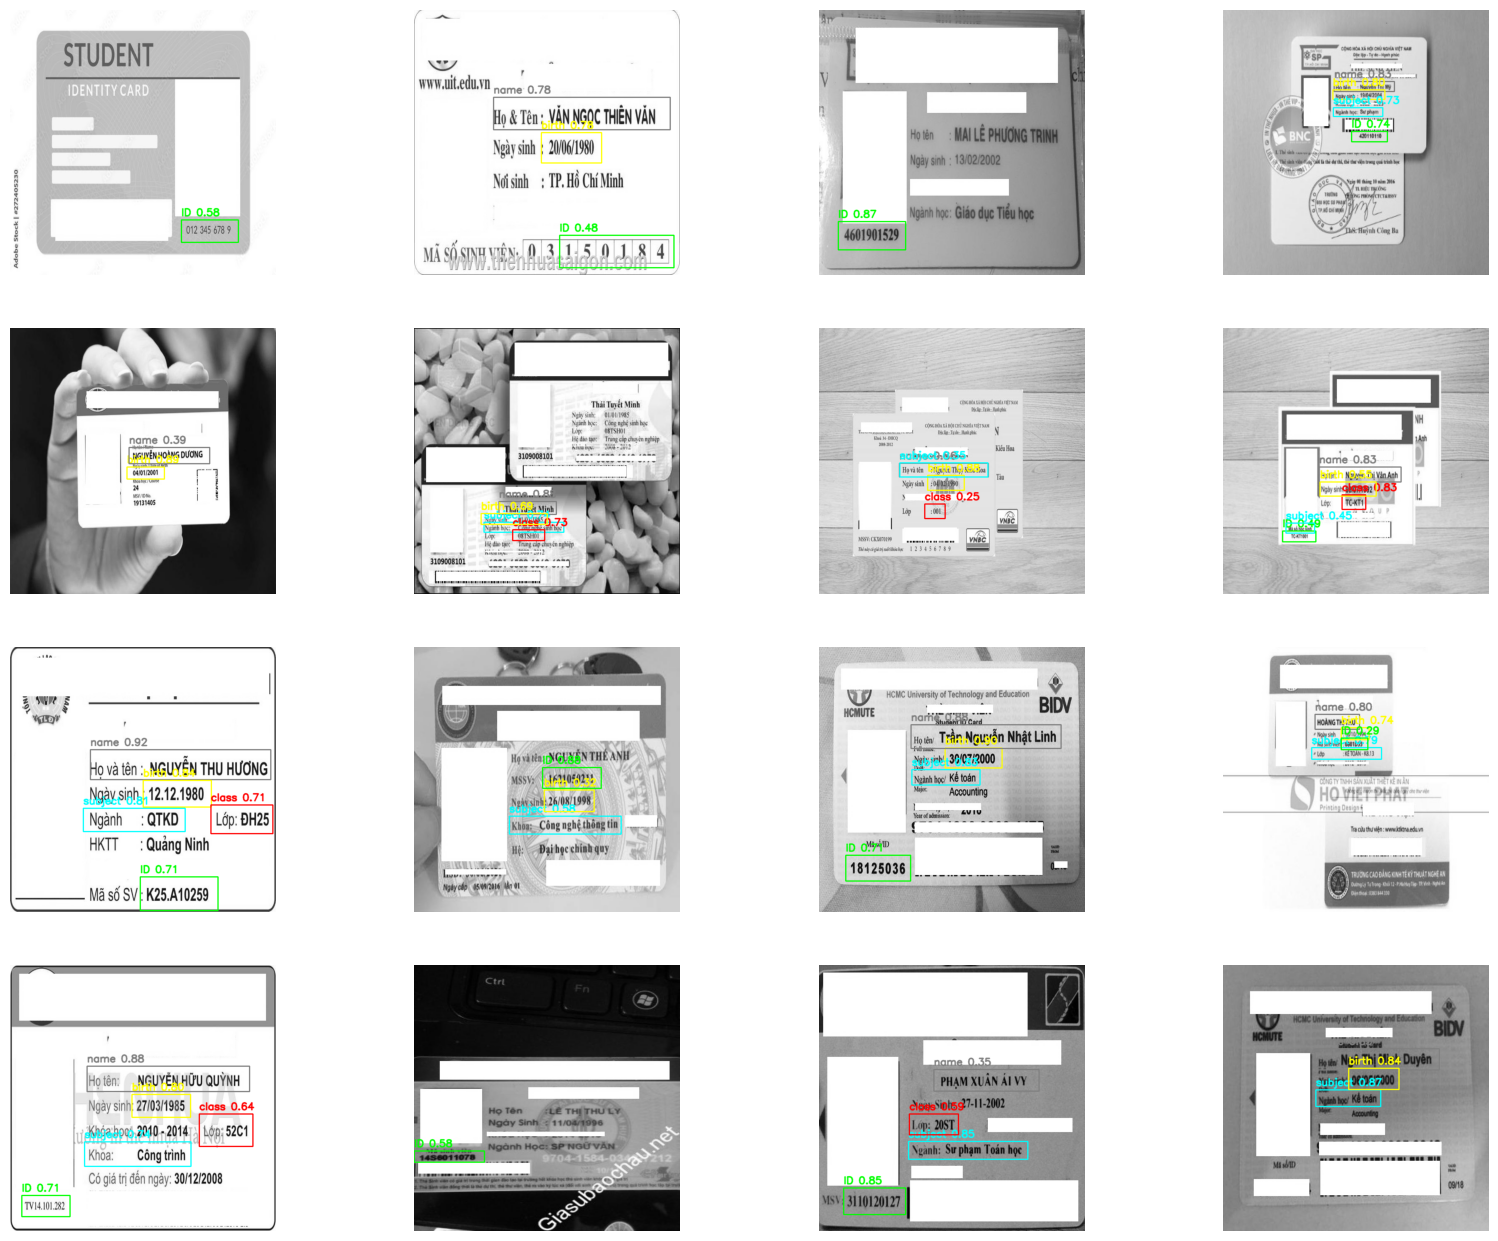

In [30]:
plot_img(detection_result)

In [43]:

    
def save_images(list_images, saved_path, custom_path=None):
    if not os.path.exists(saved_path):
        os.makedirs(saved_path)
    
    for i, img in enumerate(list_images):
        
        if custom_path is not None:
            
            img_path = os.path.join(saved_path, custom_path[i])
            cv.imwrite(img_path, img)
        else:
            sub_folder = saved_path[saved_path.rindex('/')+1:]
            img_name = f'{sub_folder}_result_{i+1}.jpg'
            img_path = os.path.join(saved_path, img_name)
            cv.imwrite(img_path, img)
        
def detect_and_save(data_path, saved_path):
    
    list_results = detection(data_path, names)
    save_images(list_results, saved_path)
list_img_path = [os.path.join('./Student-Card-(Text-detection)-12/test/images', x) for x in os.listdir('./Student-Card-(Text-detection)-12/test/images')]
list_img_path

['./Student-Card-(Text-detection)-12/test/images\\309952881_3409305412647760_4993398751330238924_n_jpg.rf.4f644b0a342f89672b84732bac4b1bdf.jpg',
 './Student-Card-(Text-detection)-12/test/images\\image-5-_jpeg.rf.6b602f84cce96d28c3f604a31412a0e2.jpg',
 './Student-Card-(Text-detection)-12/test/images\\in-the-sinh-vien-gia-re_jpg.rf.ebcbf025099cf6806b4a60ed6ff5cf00.jpg',
 './Student-Card-(Text-detection)-12/test/images\\lam-the-nhua-sinh-vien-o-dau-800x480_jpg.rf.03f9ac11df6482323cda522db4cc4ead.jpg',
 './Student-Card-(Text-detection)-12/test/images\\lam-the-sinh-vien_jpg.rf.1ad3053d2d55ea69076a3dbcd15f3233.jpg',
 './Student-Card-(Text-detection)-12/test/images\\lC3A0m-thE1BABB-nhC3A2n-viC3AAn-3_jpg.rf.79048d44fd11b2e28eb9bb04689e8d08.jpg',
 './Student-Card-(Text-detection)-12/test/images\\mau-the-sinh-vien1_result_6936485cdec7408c9bdb1d6eb2649c2c_jpg.rf.08d8d62cd29cd2efe7c9d11401741ae1.jpg',
 './Student-Card-(Text-detection)-12/test/images\\nDyqlOdZ_jpg.rf.aefc1a5df63f4946d9dee3bc03fd3b7

In [36]:
detect_train = detection('./Mask_img/train', names)
detect_test = detection('./Mask_img/test', names)
detect_valid = detection('./Mask_img/valid', names)


['./Mask_img/train\\train_result_1.jpg', './Mask_img/train\\train_result_10.jpg', './Mask_img/train\\train_result_100.jpg', './Mask_img/train\\train_result_101.jpg', './Mask_img/train\\train_result_102.jpg', './Mask_img/train\\train_result_103.jpg', './Mask_img/train\\train_result_104.jpg', './Mask_img/train\\train_result_105.jpg', './Mask_img/train\\train_result_106.jpg', './Mask_img/train\\train_result_107.jpg', './Mask_img/train\\train_result_108.jpg', './Mask_img/train\\train_result_109.jpg', './Mask_img/train\\train_result_11.jpg', './Mask_img/train\\train_result_110.jpg', './Mask_img/train\\train_result_111.jpg', './Mask_img/train\\train_result_112.jpg', './Mask_img/train\\train_result_113.jpg', './Mask_img/train\\train_result_114.jpg', './Mask_img/train\\train_result_115.jpg', './Mask_img/train\\train_result_116.jpg', './Mask_img/train\\train_result_117.jpg', './Mask_img/train\\train_result_118.jpg', './Mask_img/train\\train_result_119.jpg', './Mask_img/train\\train_result_12.jp

In [18]:
len(detect_train)

174

In [37]:
save_images(detect_train, './Result/train')

In [38]:
save_images(detect_test, './Result/test')
save_images(detect_valid, './Result/valid')

In [39]:
def mask_object(data_path, names):
    list_img_path = [os.path.join(data_path, x) for x in os.listdir(data_path)]
    list_images = []
    for img_path in list_img_path:
        img = cv.imread(img_path)
        result = model.predict(img)
        img = cv.imread(img_path)
        boxes, class_idx, confident = [], [], []

        for box, idx, conf in zip(result[0].boxes.xyxy, result[0].boxes.cls, result[0].boxes.conf):

            if idx not in class_idx:
                class_idx.append(idx)
                boxes.append(box)
                confident.append(conf)
            else :
                i = class_idx.index(idx)
                if confident[i] < conf:
                    del class_idx[i]
                    del boxes[i]
                    del confident[i]

                    class_idx.append(idx)
                    boxes.append(box)
                    confident.append(conf)
        for box, idx, conf in zip(boxes, class_idx, confident):
            x, y, w, h = [int(x) for x in box]
            cv.rectangle(img, (x, y), (w, h), (0, 0, 0), thickness=-1)
        list_images.append(img)
    return list_images, list_img_path
def save_mask_object(data_path, saved_path):
    mask_images, list_img_path = mask_object(data_path, names)
    save_images(mask_images, saved_path, list_img_path)

In [44]:
# save_mask_object('./data/train/images', './Mask_img/train')
save_mask_object('./Student-Card-(Text-detection)-12/test/images', './Mask_img')
# save_mask_object('./data/valid/images', './Mask_img/valid')

0: 640x640 2 births, 1 class, 1 name, 2 subjects, 2550.7ms
Speed: 23.9ms preprocess, 2550.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 1 ID, 1 birth, 2 names, 2 subjects, 1636.7ms
Speed: 3.2ms preprocess, 1636.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 1 ID, 2 births, 2 names, 1 subject, 1605.2ms
Speed: 4.2ms preprocess, 1605.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 1 ID, 2 births, 1 class, 1 name, 1 subject, 1628.5ms
Speed: 3.3ms preprocess, 1628.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 2 IDs, 1 birth, 1 name, 1 subject, 1628.2ms
Speed: 3.5ms preprocess, 1628.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 1 ID, 2 births, 1 class, 1 name, 1 subject, 1565.5ms
Speed: 4.4ms preprocess, 1565.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
0: 640x640 2 births, 1 class, 1 name, 2 subjects, 1